In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Sentinel-2

### data analysis and data integration

In [2]:
column_names = 'long lat B12'.split(' ')

In [3]:
sentinel_b12 = pd.read_csv('../SENTINEL/raster_resampled/sent2_b12.xyz', sep = ' ', names = column_names)
print(sentinel_b12.shape)
sentinel_b12.head()

(381468, 3)


,long,lat,B12
0,-52.815821,-4.257962,-9999
1,-52.813820,-4.257962,-9999
2,-52.811819,-4.257962,-9999
3,-52.809819,-4.257962,-9999
4,-52.807818,-4.257962,-9999


In [4]:
# processing non-values

process_cond = sentinel_b12.B12 == -9999
index_non_values = sentinel_b12[process_cond].loc[:, 'B12'].index.values
mean_ = np.round(sentinel_b12[-process_cond].B12.mean(), 3)
sentinel_b12.loc[index_non_values, 2:3] = mean_

/home/silva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  


In [5]:
sentinel_b12.head()

,long,lat,B12
0,-52.815821,-4.257962,560.29
1,-52.813820,-4.257962,560.29
2,-52.811819,-4.257962,560.29
3,-52.809819,-4.257962,560.29
4,-52.807818,-4.257962,560.29


In [6]:
xb = np.array(sentinel_b12.long).reshape(498, 766)
yb = np.array(sentinel_b12.lat).reshape(498, 766)
zb = np.array(sentinel_b12.B12).reshape(498, 766)

/home/silva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


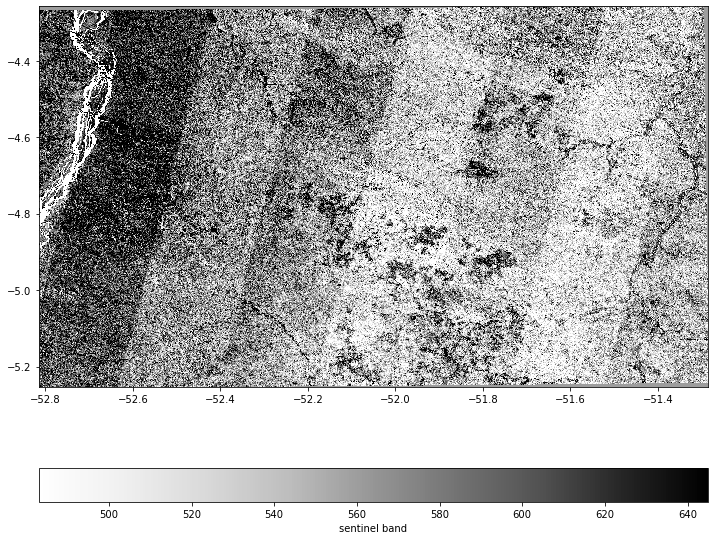

In [7]:
b12_values = sentinel_b12.B12

plt.figure(figsize = (12, 10))
plt.pcolormesh(xb, yb, zb, cmap = 'Greys',
            vmin = np.percentile(b12_values, 10), vmax = np.percentile(b12_values, 90))
plt.colorbar(label = 'sentinel band', orientation = 'horizontal')
plt.savefig('../SENTINEL/raster_resampled/pngs/sent2_b12.png', dpi = 400, bbox_inches = 'tight')

### High-pass filter

In [8]:
from scipy import signal
from scipy.signal import butter

In [66]:
sos = signal.butter(1, 18, 'hp', fs=180, output='sos')

In [67]:
b12_values = np.array(sentinel_b12.B12)
b12_filtered = signal.sosfilt(sos, b12_values)

In [68]:
zb = b12_filtered.reshape(498, 766)

/home/silva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


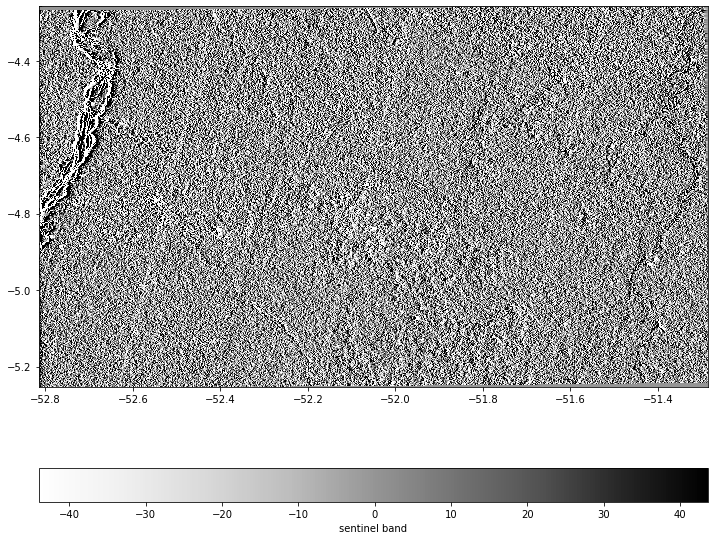

In [80]:
plt.figure(figsize = (12, 10))
plt.pcolormesh(xb, yb, zb, cmap = 'Greys',
            vmin = np.percentile(b12_filtered, 15), vmax = np.percentile(b12_filtered, 85))
plt.colorbar(label = 'sentinel band', orientation = 'horizontal')
plt.savefig('../SENTINEL/raster_resampled/pngs/sent2_b12_filtered.png', dpi = 400, bbox_inches = 'tight')

Text(0.5, 1.0, 'Original')

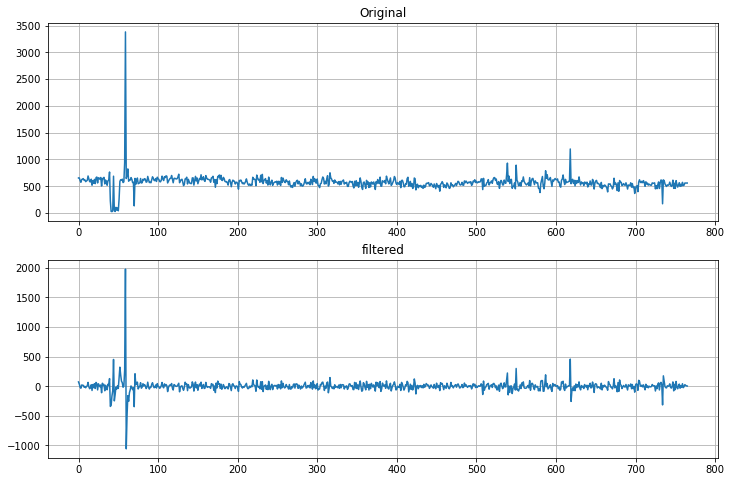

In [79]:
# Section
fig, ax = plt.subplots(nrows=2, figsize = (12, 8))

ax[1].plot(b12_filtered[766*50:766*51])
ax[1].grid(True)
ax[1].set_title('filtered')

ax[0].plot(b12_values[766*50:766*51])
ax[0].grid(True)
ax[0].set_title('Original')